In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [2]:
# === Passo 1. Carregar o dataset ===
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
vinhos = pd.read_csv(url, sep=';')

In [3]:
# === Passo 2: Matriz de correlação ===
vinhos.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [4]:
# === Passo 3: Estatísticas descritivas ===
print("\n=== Estatísticas descritivas ===")
print(vinhos.describe().round(2))


=== Estatísticas descritivas ===
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count        1599.00           1599.00      1599.00         1599.00   
mean            8.32              0.53         0.27            2.54   
std             1.74              0.18         0.19            1.41   
min             4.60              0.12         0.00            0.90   
25%             7.10              0.39         0.09            1.90   
50%             7.90              0.52         0.26            2.20   
75%             9.20              0.64         0.42            2.60   
max            15.90              1.58         1.00           15.50   

       chlorides  free sulfur dioxide  total sulfur dioxide  density       pH  \
count    1599.00              1599.00               1599.00  1599.00  1599.00   
mean        0.09                15.87                 46.47     1.00     3.31   
std         0.05                10.46                 32.90     0.00     0.15   
mi

In [5]:
# === Passo 4: Função auxiliar para calcular múltiplas estatísticas ===
def estatisticas_personalizadas(grupo):
    """Retorna várias medidas descritivas para um grupo."""
    return pd.Series({
        "média": grupo.mean(),
        "mediana": grupo.median(),
        "desvio_padrão": grupo.std(),
        "quantil_5%": grupo.quantile(0.05),
        "quantil_95%": grupo.quantile(0.95),
        "Q1 (25%)": grupo.quantile(0.25),
        "Q3 (75%)": grupo.quantile(0.75)
    })

In [6]:
# === Passo 5: Aplicar o groupby e calcular as estatísticas ===
estatisticas_por_qualidade = (
    vinhos
    .groupby("quality")
    .agg(["mean", "median", "std",
          lambda x: x.quantile(0.05),
          lambda x: x.quantile(0.95),
          lambda x: x.quantile(0.25),
          lambda x: x.quantile(0.75)])
)

In [7]:
# === Passo 6: Exibir resultados ===
print("=== Estatísticas descritivas agrupadas por 'quality' ===")
print(estatisticas_por_qualidade.round(2))

=== Estatísticas descritivas agrupadas por 'quality' ===
        fixed acidity                                                \
                 mean median   std <lambda_0> <lambda_1> <lambda_2>   
quality                                                               
3                8.36   7.50  1.77       6.74      11.06       7.15   
4                7.78   7.50  1.63       5.66      10.94       6.80   
5                8.17   7.80  1.56       6.20      11.20       7.10   
6                8.35   7.90  1.80       6.10      11.90       7.00   
7                8.87   8.80  1.99       5.58      12.05       7.40   
8                8.57   8.25  2.12       5.42      11.50       7.25   

                   volatile acidity               ...  sulphates             \
        <lambda_3>             mean median   std  ... <lambda_1> <lambda_2>   
quality                                           ...                         
3             9.88             0.88   0.84  0.33  ...       0.76  

In [8]:
# === Passo 7: Definir variável dependente (y) e independentes (X) ===
y = vinhos["quality"]
X = vinhos.drop(columns=["quality"])

In [9]:
# === Passo 8: Adicionar constante (termo intercepto) ===
X = sm.add_constant(X)

In [10]:
# === Passo 9: Ajustar o modelo de regressão linear ===
modelo = sm.OLS(y, X).fit()

In [11]:
# === Passo 10: Exibir resumo dos resultados ===
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Mon, 20 Oct 2025   Prob (F-statistic):          1.79e-145
Time:                        17:40:58   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.9652 

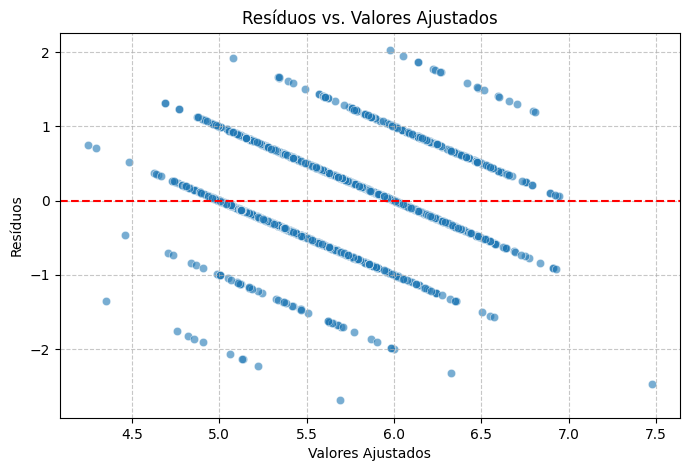

In [12]:
# === Passo 11: Análise dos resíduos ===

# Resíduos e valores ajustados
residuos = modelo.resid
ajustados = modelo.fittedvalues

# Gráfico 1: Resíduos vs. valores ajustados
plt.figure(figsize=(8,5))
sns.scatterplot(x=ajustados, y=residuos, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Resíduos vs. Valores Ajustados")
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

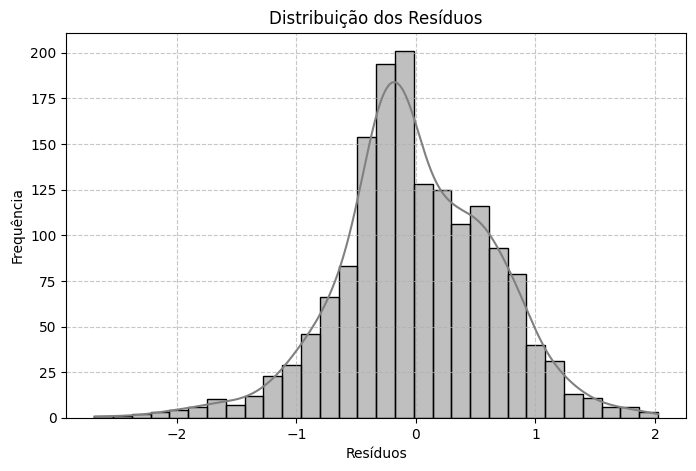

In [13]:
# Gráfico 2: Histograma dos resíduos
plt.figure(figsize=(8,5))
sns.histplot(residuos, bins=30, kde=True, color="gray")
plt.title("Distribuição dos Resíduos")
plt.xlabel("Resíduos")
plt.ylabel("Frequência")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

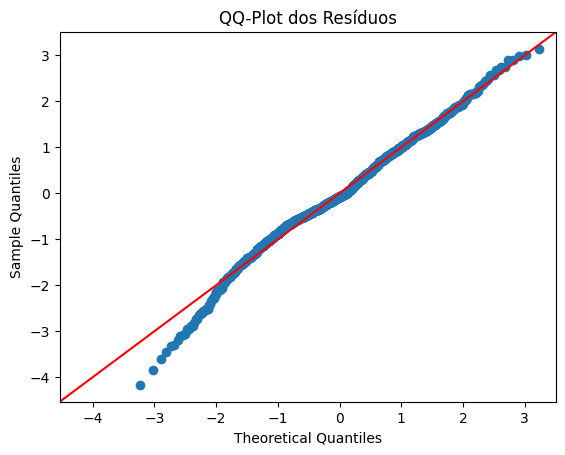

In [14]:
# Gráfico 3: QQ-plot dos resíduos (normalidade)
sm.qqplot(residuos, line='45', fit=True)
plt.title("QQ-Plot dos Resíduos")
plt.show()

In [15]:
# === Passo 12: Avaliação geral ===
r2 = modelo.rsquared
r2_ajustado = modelo.rsquared_adj
print(f"\nCoeficiente de determinação R²: {r2:.3f}")
print(f"R² ajustado: {r2_ajustado:.3f}")


Coeficiente de determinação R²: 0.361
R² ajustado: 0.356
